Dataset Preview:
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3

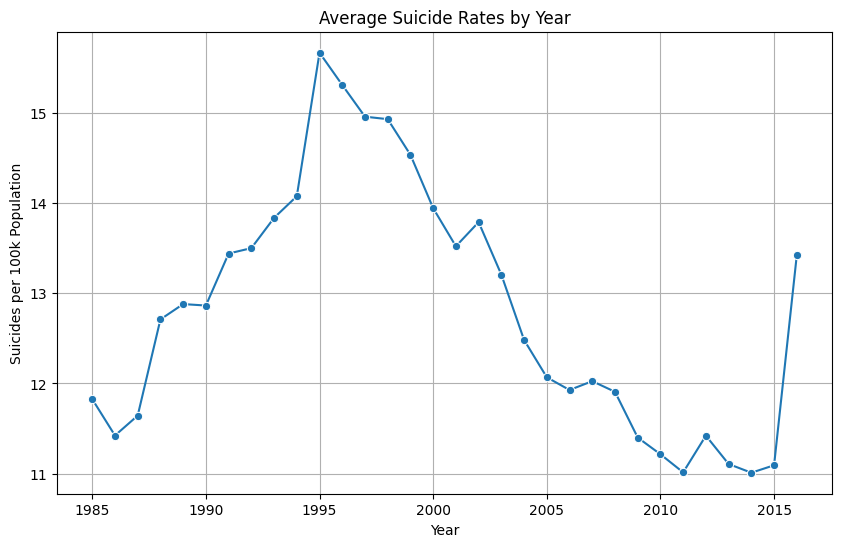


Average Suicide Rates by Generation:
generation
G.I. Generation    23.946378
Silent             18.418848
Boomers            14.742094
Generation X       10.556874
Millenials          5.383597
Generation Z        0.642299
Name: suicides/100k pop, dtype: float64


C:\Users\Pranika Kumar\AppData\Local\Temp\ipykernel_25816\240797852.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generation_analysis.index, y=generation_analysis.values, palette="viridis")


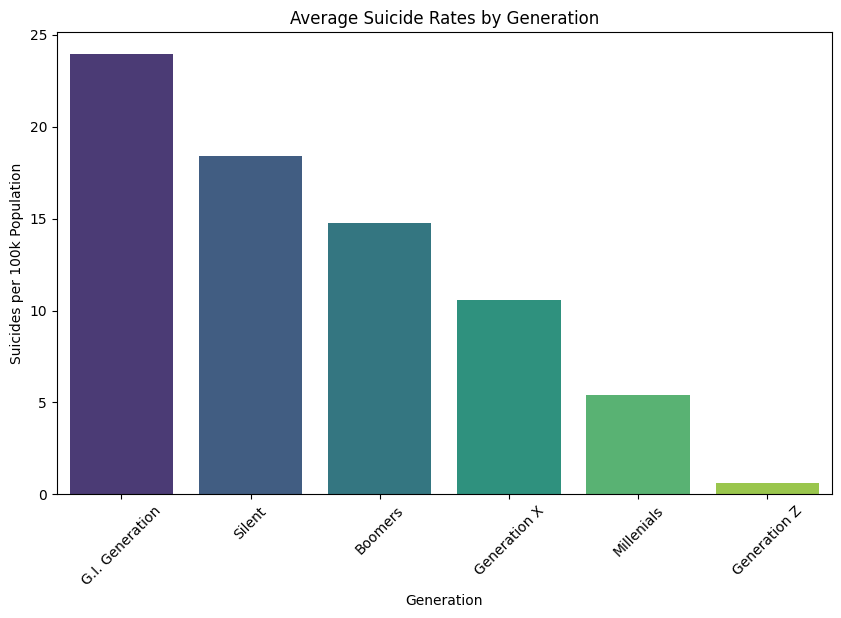

In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Pranika Kumar\Downloads\Suicide data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Data Cleaning: Replace "########" in 'HDI for year' with NaN
df['HDI for year'] = df['HDI for year'].replace("########", pd.NA)

# Convert 'HDI for year' to numeric
df['HDI for year'] = pd.to_numeric(df['HDI for year'], errors='coerce')

# General statistics
print("\nBasic Statistics:")
print(df.describe())

# Grouping and analysis: Average suicide rates by year
average_suicide_rates = df.groupby('year')['suicides/100k pop'].mean()

print("\nAverage Suicide Rates by Year:")
print(average_suicide_rates)

# Visualization of Suicide Rates (requires Matplotlib and Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_suicide_rates.index, y=average_suicide_rates.values, marker="o")
plt.title("Average Suicide Rates by Year")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.grid(True)
plt.show()

# Grouping and analysis: Suicide rates by generation
generation_analysis = df.groupby('generation')['suicides/100k pop'].mean().sort_values(ascending=False)

print("\nAverage Suicide Rates by Generation:")
print(generation_analysis)

# Plot suicide rates by generation
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_analysis.index, y=generation_analysis.values, palette="viridis")
plt.title("Average Suicide Rates by Generation")
plt.xlabel("Generation")
plt.ylabel("Suicides per 100k Population")
plt.xticks(rotation=45)
plt.show()


Explained Variance Ratios: [0.33813534 0.25384778]


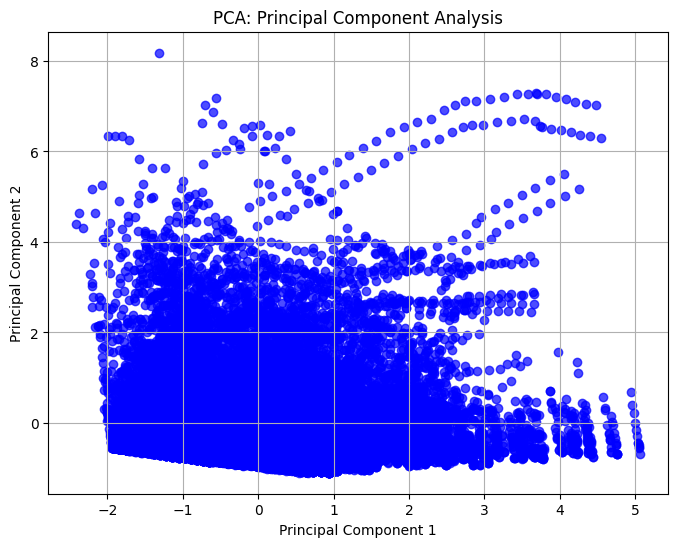

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Dataset
file_path = r"C:\Users\Pranika Kumar\Downloads\Suicide data.csv"
df = pd.read_csv(file_path)

# Selecting Numerical Features
numerical_features = ['year', 'population', 'gdp_per_capita ($)', 'suicides/100k pop']
X = df[numerical_features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Variance Explained by Each Component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Creating a DataFrame for PCA Results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Scatter Plot of Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c='blue')
plt.title("PCA: Principal Component Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


In [7]:
import numpy as np

# Original Matrix (example)
A = np.array([[3, 2, 2],
              [2, 3, -2]])

# Perform SVD
U, S, Vt = np.linalg.svd(A)

print("Matrix A:")
print(A)
print("\nLeft Singular Vectors (U):")
print(U)
print("\nSingular Values (S):")
print(S)
print("\nRight Singular Vectors (V^T):")
print(Vt)


Matrix A:
[[ 3  2  2]
 [ 2  3 -2]]

Left Singular Vectors (U):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Singular Values (S):
[5. 3.]

Right Singular Vectors (V^T):
[[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


Explained Variance Ratios: [0.33813534 0.25384778]


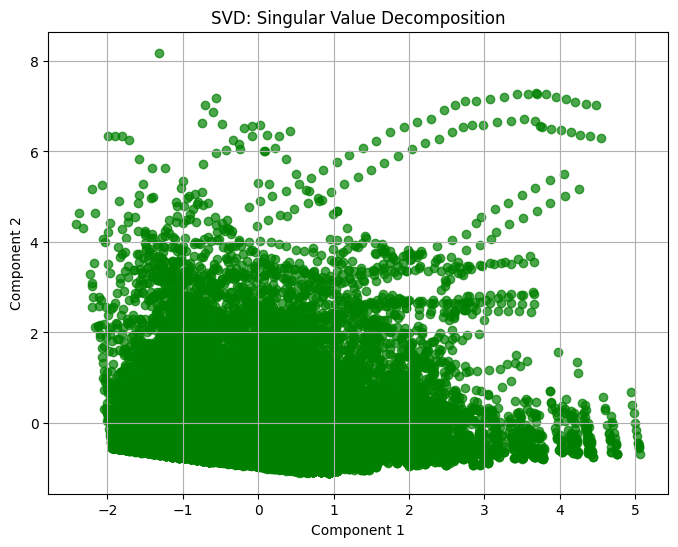

In [8]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Load Dataset
file_path = r"C:\Users\Pranika Kumar\Downloads\Suicide data.csv"
df = pd.read_csv(file_path)

# Selecting Numerical Features
numerical_features = ['year', 'population', 'gdp_per_capita ($)', 'suicides/100k pop']
X = df[numerical_features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying SVD
svd = TruncatedSVD(n_components=2)  # Reduce to 2 components
X_svd = svd.fit_transform(X_scaled)

# Explained Variance
explained_variance = svd.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Creating a DataFrame for SVD Results
svd_df = pd.DataFrame(data=X_svd, columns=['Component 1', 'Component 2'])

# Scatter Plot of Reduced Data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(svd_df['Component 1'], svd_df['Component 2'], alpha=0.7, color='green')
plt.title("SVD: Singular Value Decomposition")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()
plt.show()


Extracted Factors:
    Factor 1  Factor 2
0 -1.168613  0.193361
1 -1.167641  0.186825
2 -1.167558  0.184626
3 -1.169698  0.173440
4 -1.166657  0.177565

Factor Loadings:
               year  population  gdp_per_capita ($)  suicides/100k pop
Factor 1  0.611832    0.075564            0.623436          -0.029200
Factor 2 -0.214915    0.170379            0.198453           0.093153


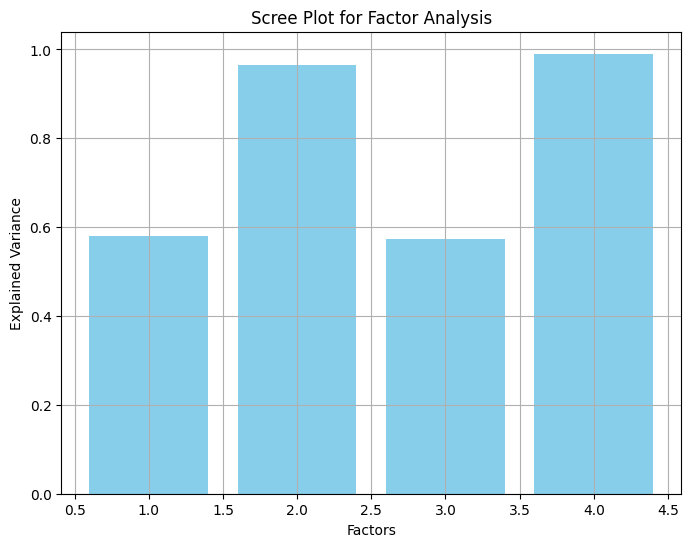

In [9]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Dataset
file_path = r"C:\Users\Pranika Kumar\Downloads\Suicide data.csv"
df = pd.read_csv(file_path)

# Selecting Numerical Features
numerical_features = ['year', 'population', 'gdp_per_capita ($)', 'suicides/100k pop']
X = df[numerical_features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Factor Analysis
n_factors = 2  # Number of factors to extract
fa = FactorAnalysis(n_components=n_factors, random_state=42)
X_factors = fa.fit_transform(X_scaled)

# Create DataFrame for Factors
factor_df = pd.DataFrame(X_factors, columns=[f'Factor {i+1}' for i in range(n_factors)])
print("Extracted Factors:\n", factor_df.head())

# Factor Loadings
factor_loadings = pd.DataFrame(fa.components_, columns=numerical_features, index=[f'Factor {i+1}' for i in range(n_factors)])
print("\nFactor Loadings:\n", factor_loadings)

# Scree Plot (Explained Variance)
explained_variance = fa.noise_variance_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.title("Scree Plot for Factor Analysis")
plt.xlabel("Factors")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()


Intrinsic Dimensionality: 47


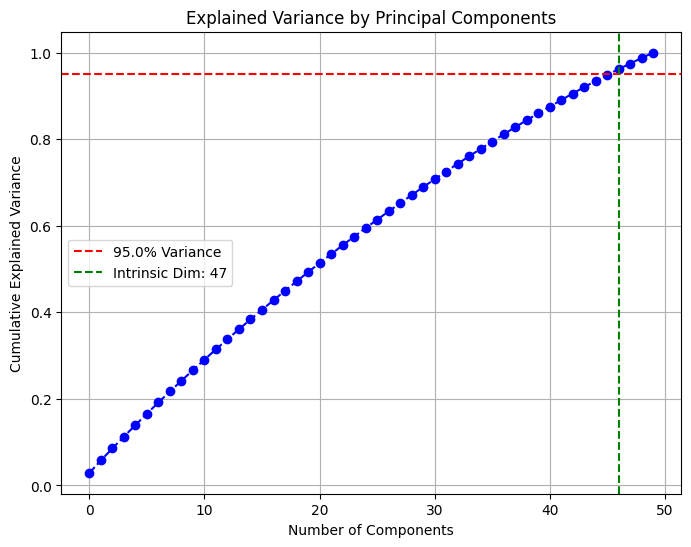

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate Synthetic High-Dimensional Data
np.random.seed(42)
data = np.random.rand(1000, 50)  # 1000 samples, 50 features

# Apply PCA
pca = PCA()
pca.fit(data)

# Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine Intrinsic Dimensionality
threshold = 0.95  # 95% variance explained
intrinsic_dim = np.argmax(explained_variance >= threshold) + 1

print(f"Intrinsic Dimensionality: {intrinsic_dim}")

# Plot Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(explained_variance, marker='o', linestyle='--', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{threshold*100}% Variance')
plt.axvline(x=intrinsic_dim-1, color='green', linestyle='--', label=f'Intrinsic Dim: {intrinsic_dim}')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()


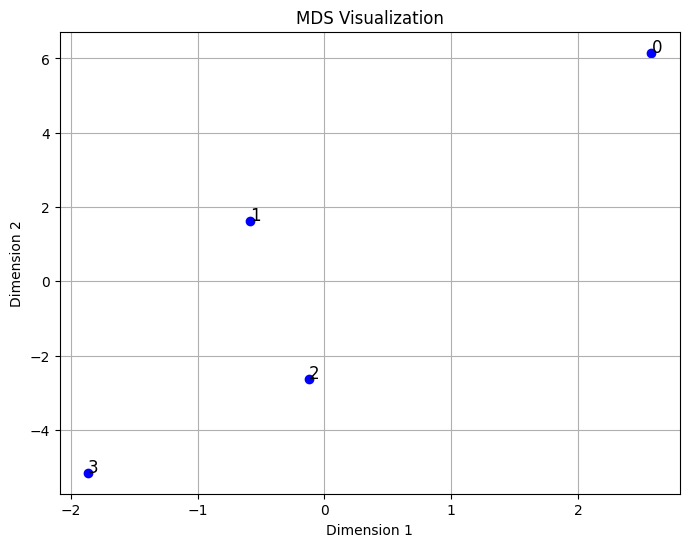

In [11]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Sample data (You can replace it with your dataset)
data = pd.DataFrame({
    'A': [1, 4, 6, 8],
    'B': [1, 5, 7, 9],
    'C': [1, 3, 6, 7]
})

# Compute a dissimilarity matrix (Euclidean distance)
dist_matrix = pairwise_distances(data, metric='euclidean')

# Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_data = mds.fit_transform(dist_matrix)

# Visualize the MDS result
plt.figure(figsize=(8, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], color='blue', marker='o')
for i, txt in enumerate(data.index):
    plt.annotate(txt, (mds_data[i, 0], mds_data[i, 1]), fontsize=12)

plt.title("MDS Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


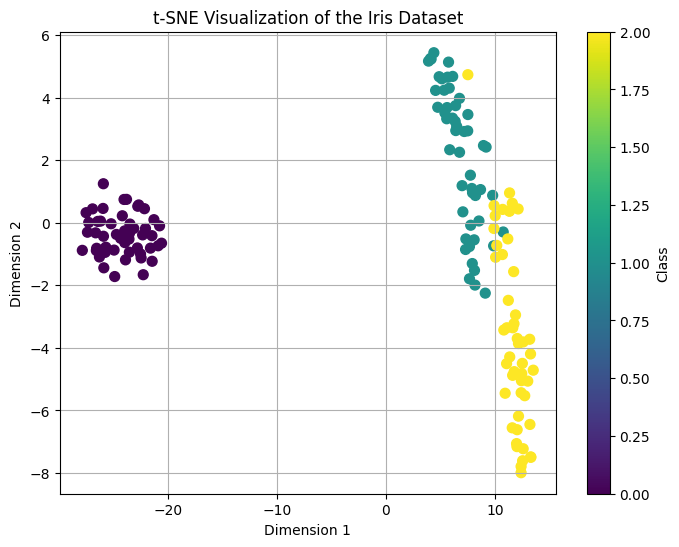

In [12]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Apply t-SNE for dimensionality reduction (reduce to 2D)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting the 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title("t-SNE Visualization of the Iris Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [14]:
pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11736 sha256=748aa21364feecb5b73e94d6fd8cdaff911b9e0241eadc92085eb73799eb1301
  Stored in directory: c:\users\pranika kumar\appdata\local\pip\cache\wheels\fb\18\e8\1b48143944f72c2cf3c4b9c134a93239c9b0bb96902269a47e
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!pip install minisom



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


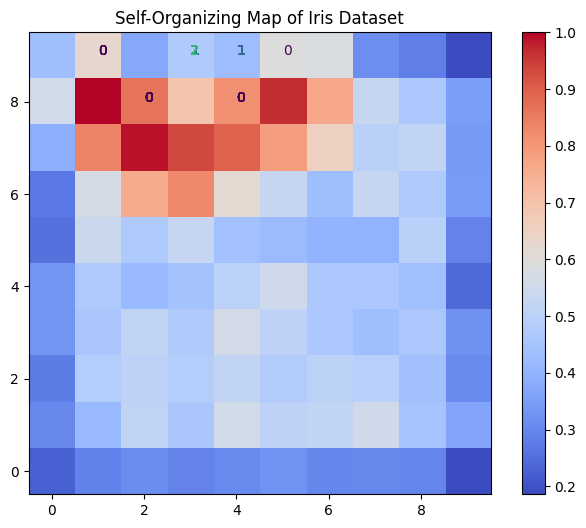

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train(X, 100)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.title("Self-Organizing Map of Iris Dataset")
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()

# Plotting the data points on the SOM grid
for i, x in enumerate(X):
    win = som.winner(x)  # find the winning neuron
    plt.text(win[0], win[1], str(y[i]), color=plt.cm.viridis(y[i] / 3.))

plt.show()


Linear Regression Model Performance:
Mean Squared Error (MSE): 348.2233079351172
R-squared (R2): 0.003536519443387398


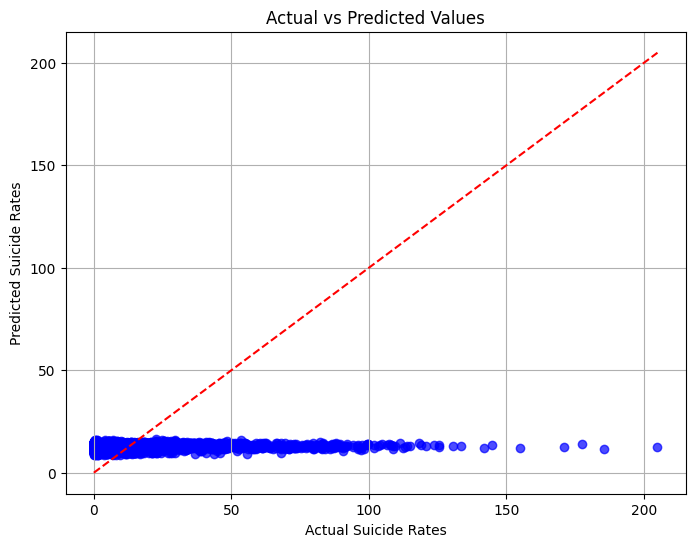

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Pranika Kumar\Downloads\Suicide data.csv"
df = pd.read_csv(file_path)

# Data Cleaning
df['HDI for year'] = df['HDI for year'].replace("########", pd.NA)
df['HDI for year'] = pd.to_numeric(df['HDI for year'], errors='coerce')

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Feature Selection
features = ['year', 'population', 'gdp_per_capita ($)', 'HDI for year']
target = 'suicides/100k pop'

# Splitting the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Fix for IndexError: Align indices for y_test and y_pred
y_test_aligned = y_test.reset_index(drop=True)
y_pred_aligned = pd.Series(y_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_aligned, y_pred_aligned, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Suicide Rates")
plt.ylabel("Predicted Suicide Rates")
plt.plot([y_test_aligned.min(), y_test_aligned.max()],
         [y_test_aligned.min(), y_test_aligned.max()],
         color='red', linestyle='--')
plt.grid()
plt.show()
